### Predicting used car price

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
car_df = pd.read_csv("/data/workspace_files/cars_data.csv")

In [0]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [0]:
car_df.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [0]:
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [0]:
car_df.shape

(428, 15)

In [0]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [0]:
car_df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [0]:
# Check if there are any missing elements
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

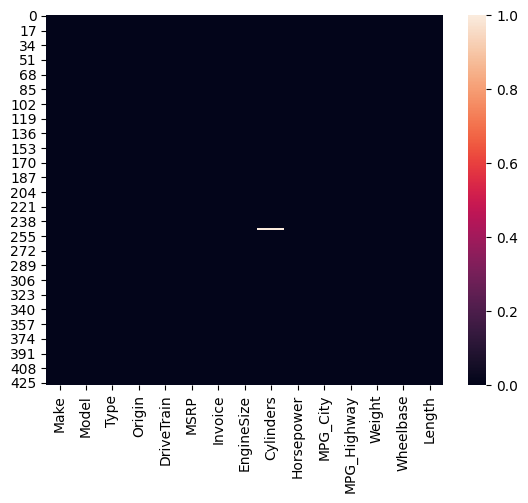

In [0]:
sns.heatmap(car_df.isnull())
plt.show()

In [0]:
car_df[car_df['Cylinders'].isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [0]:
car_df.dropna(inplace=True)

In [0]:
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

We can see that from the calculation above as well as the heatmap that there are a few(2) missing values in the cylinders column

In [0]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [0]:
# Converting Invoice to int and removing $ and , from values

car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

<ipython-input-74-721ce763c947-SdwxTcY3dyrvmFXDrzAJsV>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [0]:
# Converting MSRP to int and removing $ and , from values

car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

<ipython-input-75-8e65e3ee98e1-vGzkd3TfMyBYQVZdjgoUYV>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [0]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [0]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,32804.549296,30040.654930,3.205634,5.807512,215.877934,20.070423,26.854460,3580.474178,108.164319,186.420188
std,19472.460825,17679.430122,1.103520,1.558443,71.991040,5.248616,5.752335,759.870073,8.330030,14.366611
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,18836.000000,2.400000,4.000000,165.000000,17.000000,24.000000,3111.250000,103.000000,178.000000
50%,27807.500000,25521.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39225.000000,35754.750000,3.900000,6.000000,255.000000,21.750000,29.000000,3979.250000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


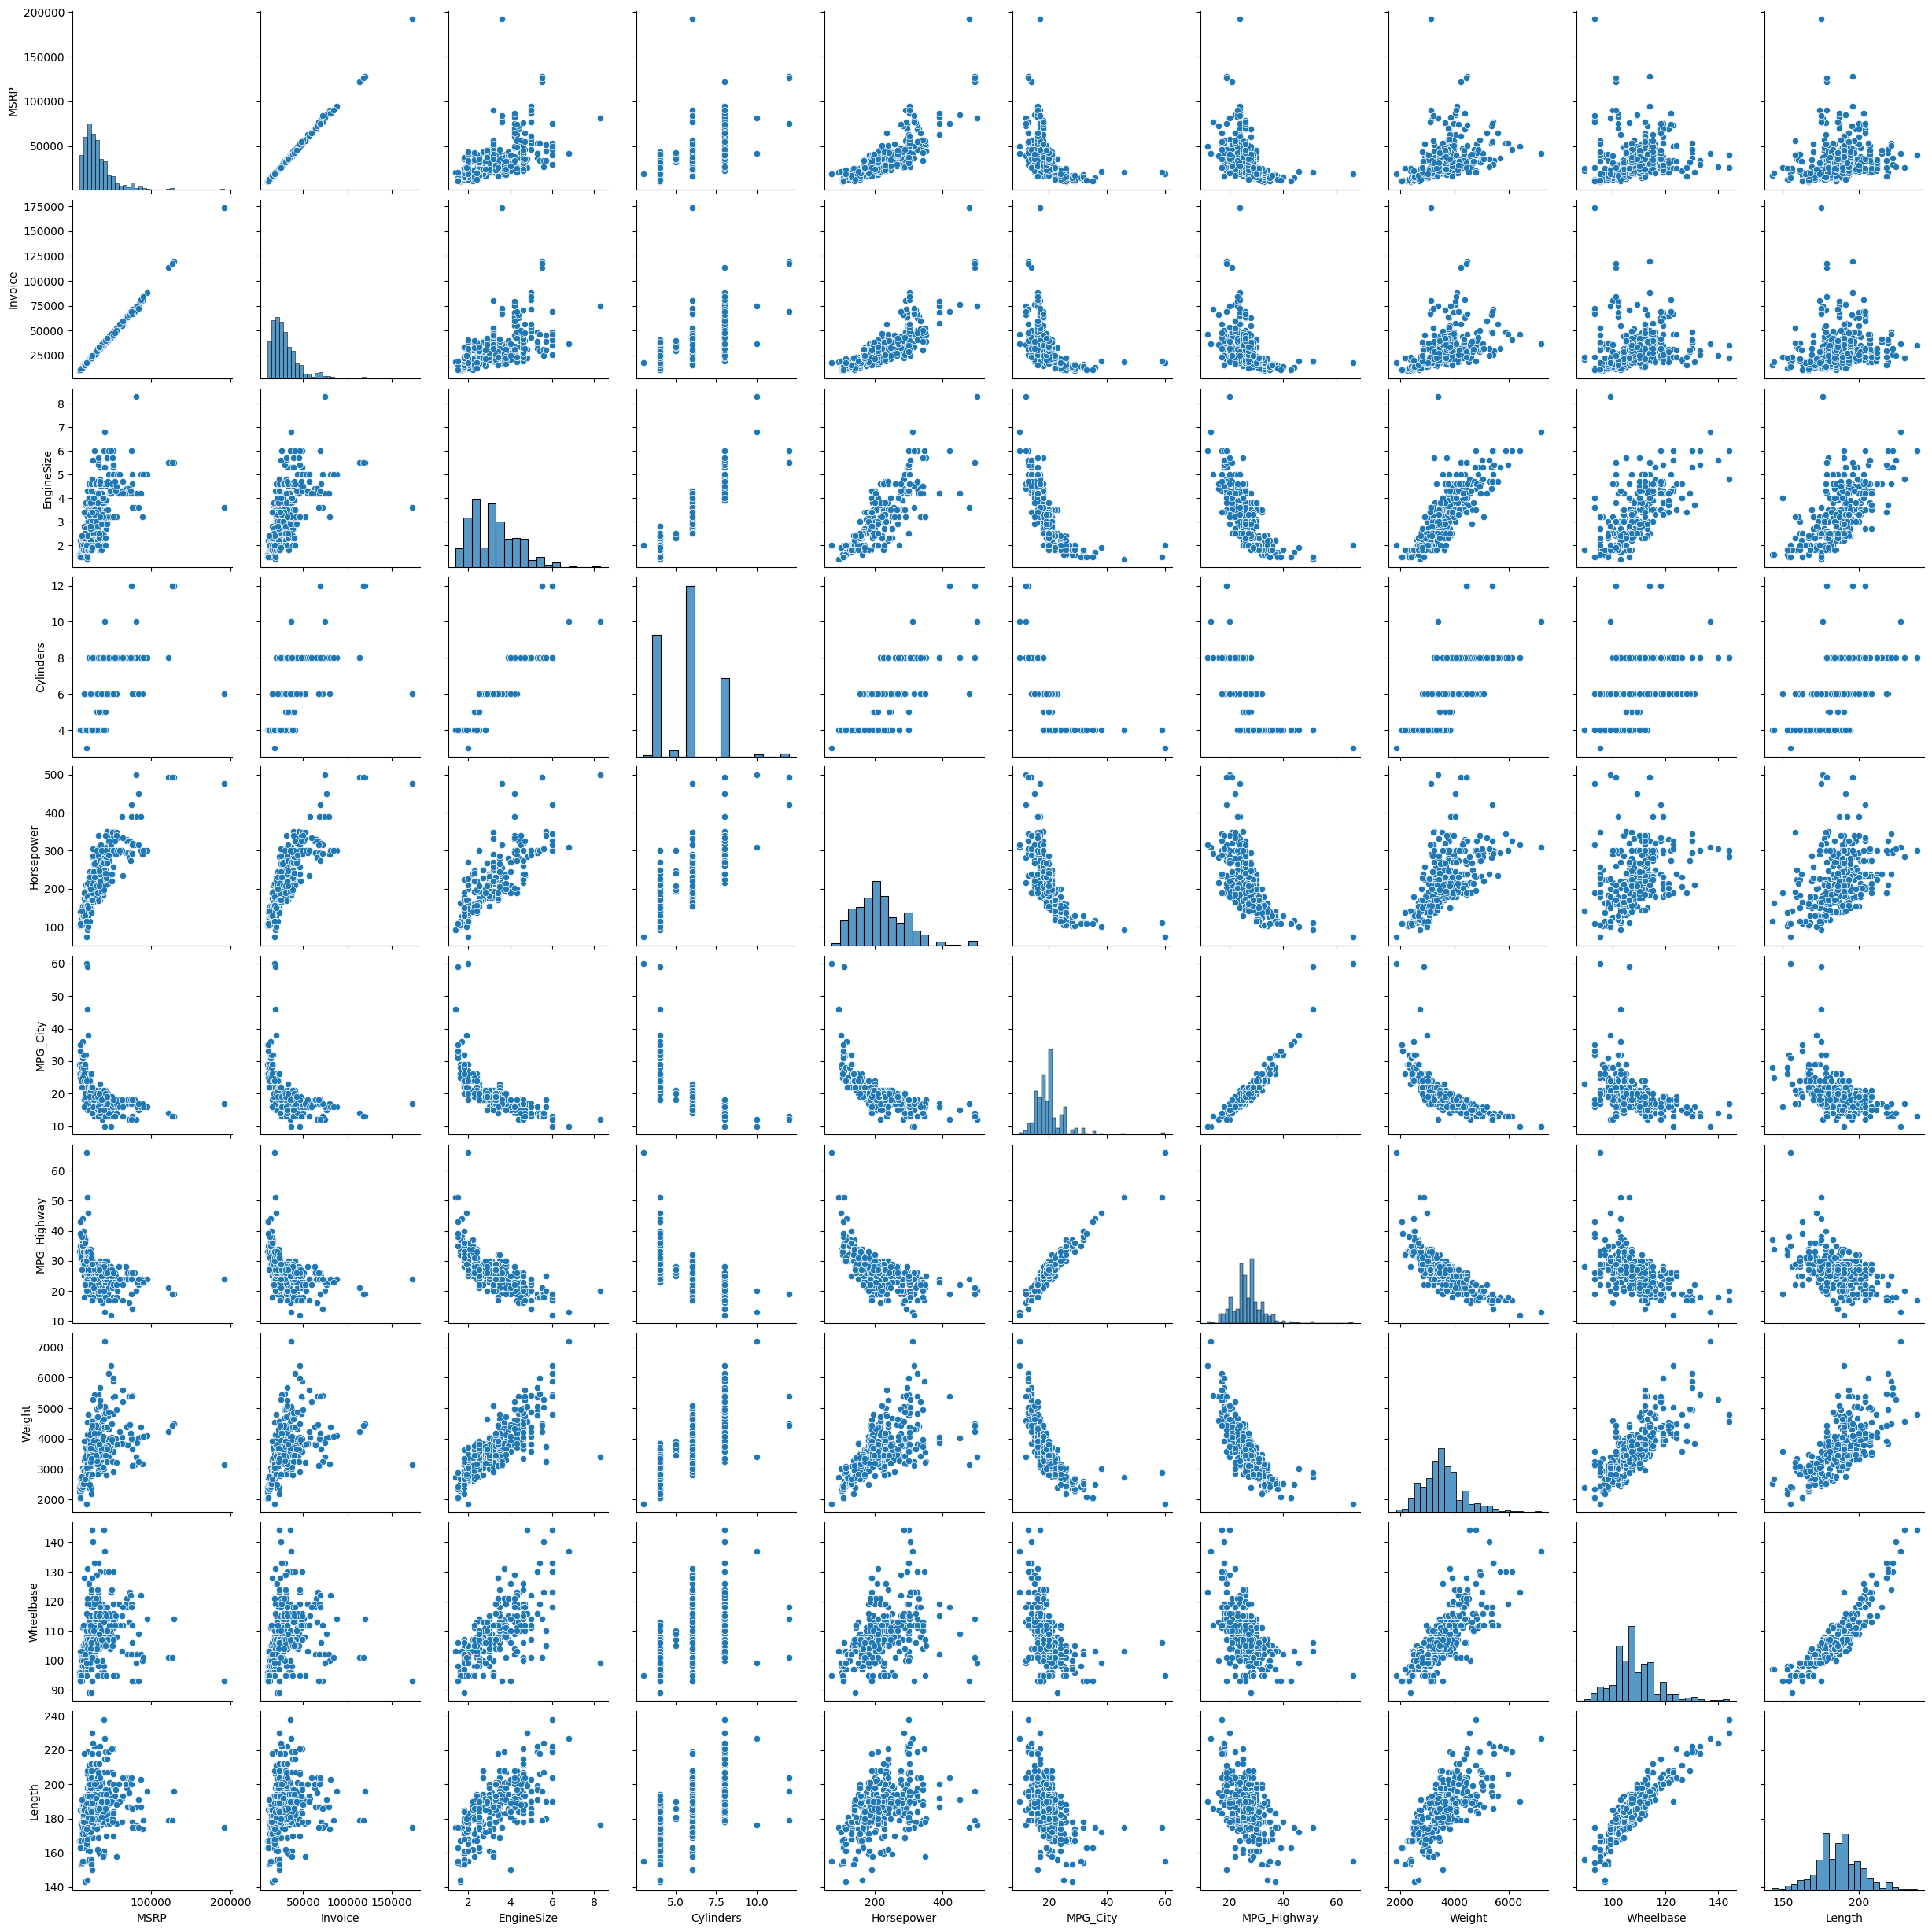

In [0]:
sns.pairplot(car_df)
plt.show()

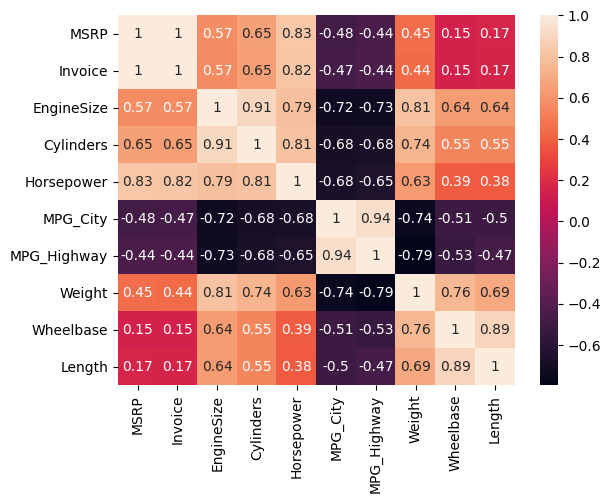

In [0]:
# checking correlation
sns.heatmap(car_df.corr(), annot=True)
plt.show()

 From the above histogram plots, we can see that almost all features depict the skewness to the right.
Hence, we can say that there are more outliers to the right except for the length of the car which looks that it is normally distributed.

Secondly we can see strong positive correlation between engine size and horsepower, which seems pretty obvious as the engine size increases the horse power increases. Also the increase in weight can be because of the increase in size of an engine.

On the other hand the mileage decreases as it seems the higher capacity engines could be of some type of a high performance car


We can see the skewness to the right for almost every feature which depicts that those outliers could be these high performance cars as the engine size, horse power and cylinders histogram skew towards right.


While exploring the correlation between MSRP and other features, we can see that there is a strong positive correlation between MSRP and the horsepower.

In [0]:
# Lets see all the companies in car_df

car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [0]:
import plotly as px

In [0]:
fig = px.hist_series(car_df, x = "Make",
                   labels = {"Make": "Manufacturer"},
                   title = "MAKE OF THE CAR",
                   color_discrete_sequence = ["maroon"])

fig.show()

Unsupported

In [0]:
fig = px.hist_series(car_df, x = "Type",
                   labels = {"Type": "Vehicle Type"},
                   title = "Type of Vehicle",
                   color_discrete_sequence = ["green"])

fig.show()

Unsupported

In [0]:
fig = px.hist_series(car_df, x = "Origin",
                   labels = {"Type": "Location"},
                   title = "Origin of company",
                   color_discrete_sequence = ["blue"])

fig.show()

Unsupported

In [0]:

fig = px.hist_series(car_df, x = "DriveTrain",
                   labels = {"Type": "Drive Train"},
                   title = "Drive Trainy",
                   color_discrete_sequence = ["red"])

fig.show()

Unsupported

In [0]:
fig = px.hist_series(car_df, x = "Make",
                     color = "Origin",
                   labels = {"Make": "Manufacturer"},
                   title = "Origin of company and its name",
                    )

fig.show()

Unsupported

In [0]:
fig = px.hist_series(car_df, x = "Make",
                     color = "Type",
                   labels = {"Make": "Manufacturer"},
                   title = "Make and type of a vehicle",
                    )

fig.show()

Unsupported

Above chart depict that all the green color segments could be the outliers as the green color in the bar represents the "sports" type and the make Porsche makes highest number of sports car and only Toyota and Honda makes the hybrid cars. 

In [0]:
# Visualisation using wordcloud

from wordcloud import WordCloud, STOPWORDS

In [0]:
text = car_df.Model.values

In [0]:
stopwords = set(STOPWORDS)

In [0]:
wc = WordCloud(background_color='black', max_words= 2000, max_font_size= 100, random_state=3, stopwords=stopwords,
               contour_width=3).generate(str(text))

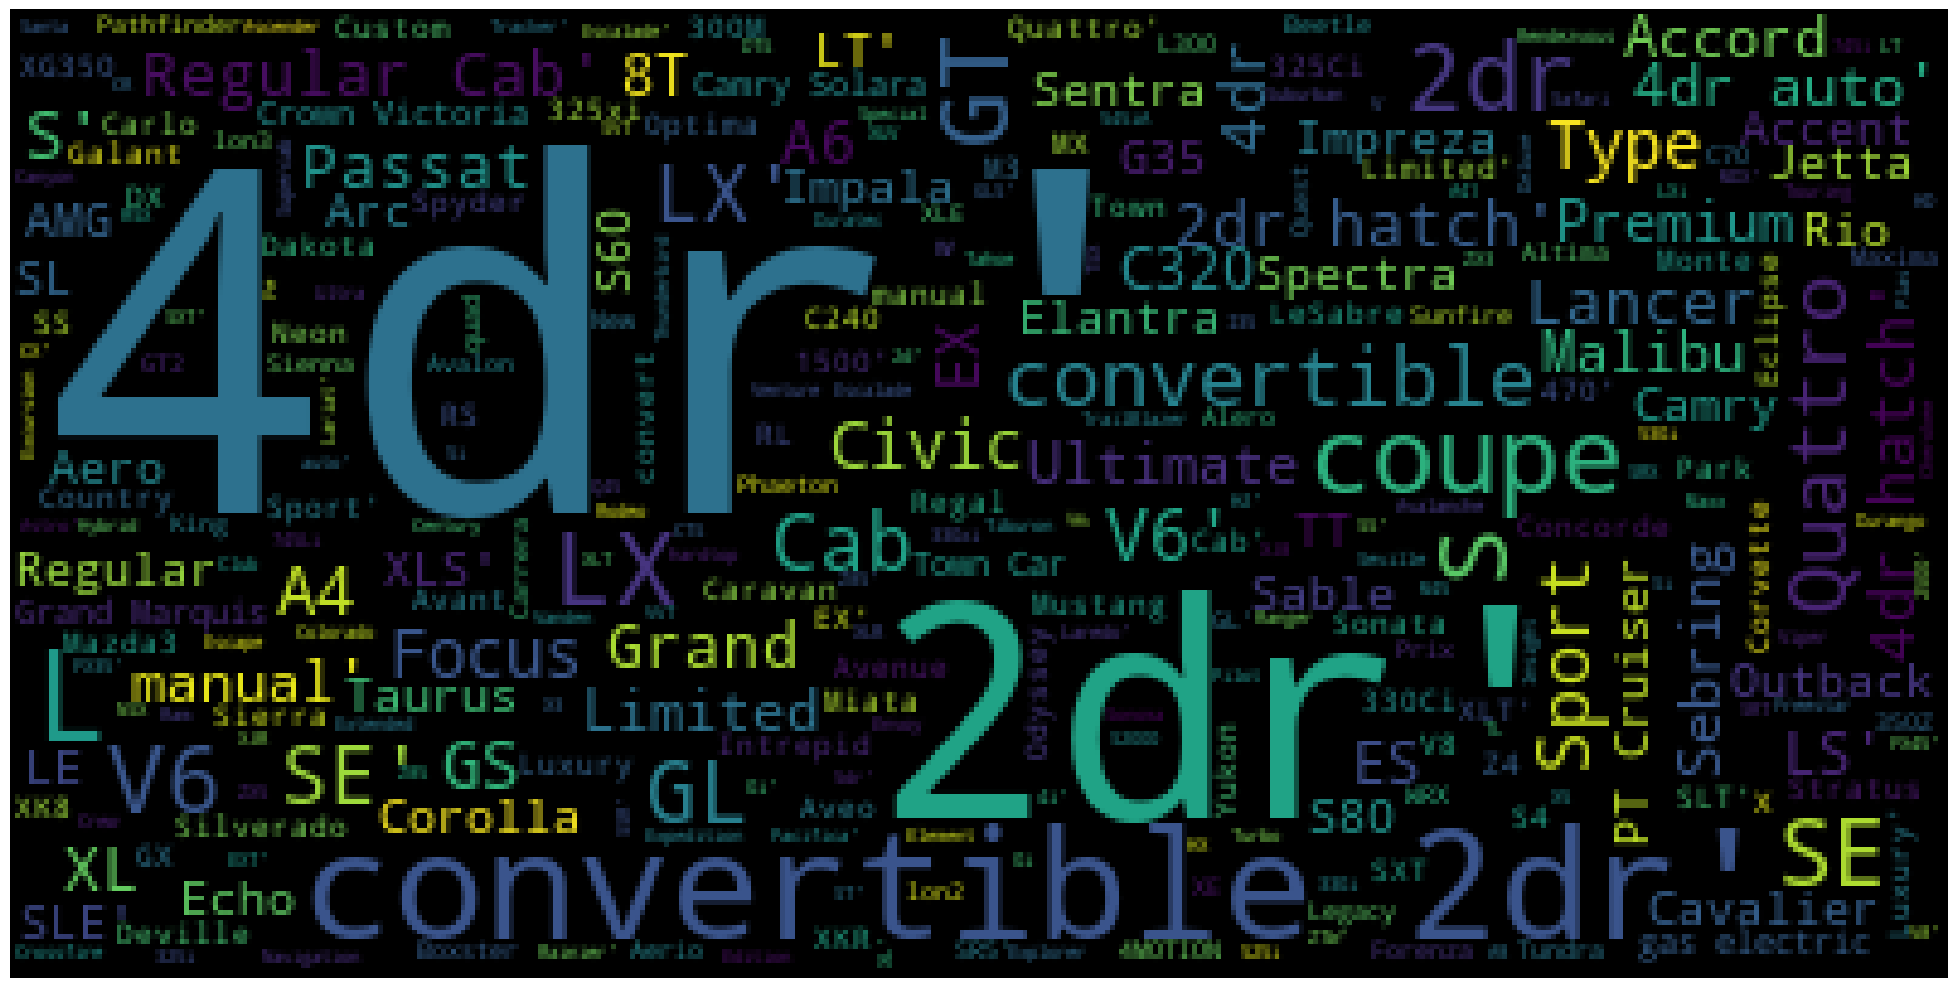

In [0]:
fig = plt.figure(figsize = (25,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Cleaning and preparing the data for training

In [0]:
df_dum = pd.get_dummies(car_df, columns = ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], drop_first=True) # aka one hot 

In [0]:
df_dum

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,Make_Honda,Make_Hummer,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_MINI,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Pontiac,Make_Porsche,Make_Saab,...,Model_Vibe,Model_Viper SRT-10 convertible 2dr,Model_Vitara LX,Model_Wrangler Sahara convertible 2dr,Model_X-Type 2.5 4dr,Model_X-Type 3.0 4dr,Model_X3 3.0i,Model_X5 4.4i,Model_XC70,Model_XC90 T6,Model_XG350 4dr,Model_XG350 L 4dr,Model_XJ8 4dr,Model_XJR 4dr,Model_XK8 convertible 2dr,Model_XK8 coupe 2dr,Model_XKR convertible 2dr,Model_XKR coupe 2dr,Model_XL-7 EX,Model_XLR convertible 2dr,Model_Xterra XE V6,Model_Yukon 1500 SLE,Model_Yukon XL 2500 SLT,Model_Z4 convertible 2.5i 2dr,Model_Z4 convertible 3.0i 2dr,Model_lon2 4dr,Model_lon2 quad coupe 2dr,Model_lon3 4dr,Model_lon3 quad coupe 2dr,Model_xA 4dr hatch,Model_xB,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Europe,Origin_USA,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,38203,2.4,5.0,197,21,28,3450,105,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
424,42565,40083,2.3,5.0,242,20,26,3450,105,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
425,45210,42573,2.9,6.0,268,19,26,3653,110,190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
426,26135,24641,1.9,4.0,170,22,29,2822,101,180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [0]:
df_data = df_dum.drop(['Invoice'], axis=1)

In [0]:
df_data.shape

(426, 477)

In [0]:
# Splitting the data

X = df_data.drop(['MSRP'], axis=1)
y = df_data['MSRP']

In [0]:
# Converting the data into an array

X = np.array(X)
y = np.array(y)

In [0]:
# Training the data

from sklearn.model_selection import  train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((340, 476), (86, 476), (340,), (86,))

### Now we will predict the continuous variable MSRP through Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from math import sqrt

In [0]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

LinearRegression()

In [0]:
accuracy_linearRegression = linearRegression_model.score(X_test, y_test)
print(accuracy_linearRegression)

0.7842981779789897


### Train and Evaluate Decision tree and Random forest Models

In [0]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [0]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
print(accuracy_DecisionTree)

0.7314227537745278


In [0]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [0]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
print(accuracy_RandomForest)

0.7376270961437256


### NOw we will use XGBOOST

In [0]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [0]:
accuracy_XGBoost = model.score(X_test, y_test)
print(accuracy_XGBoost)

0.8547854569198877


## Compare models and calculate regression KPI's

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



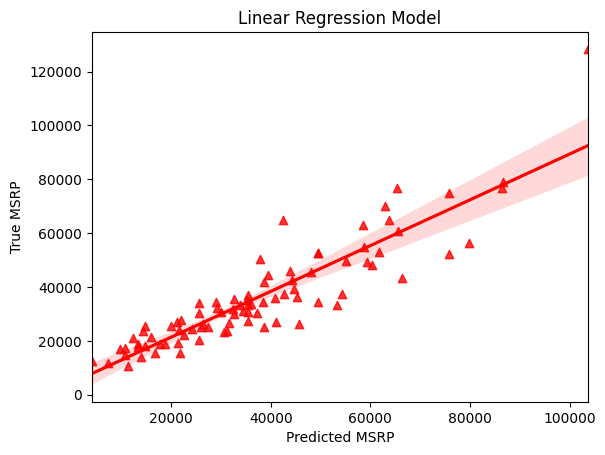

In [0]:
# Linear

y_predict_linear = linearRegression_model.predict(X_test)

#plotting against y_test

fig = sns.regplot(y_predict_linear, y_test, color='r', marker='^')
fig.set(title = "Linear Regression Model", xlabel= "Predicted MSRP", ylabel= "True MSRP")

In [0]:
r2 = r2_score(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
MSE = mean_squared_error(y_test, y_predict_linear)
RMSE = np.sqrt(MSE)

print('r2 = ' ,r2, 'MAE = ',MAE, 'MSE = ',MSE, 'RMSE = ',RMSE)

r2 =  0.7842981779789897 MAE =  6555.734560048513 MSE =  79105471.10929047 RMSE =  8894.125651759732


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



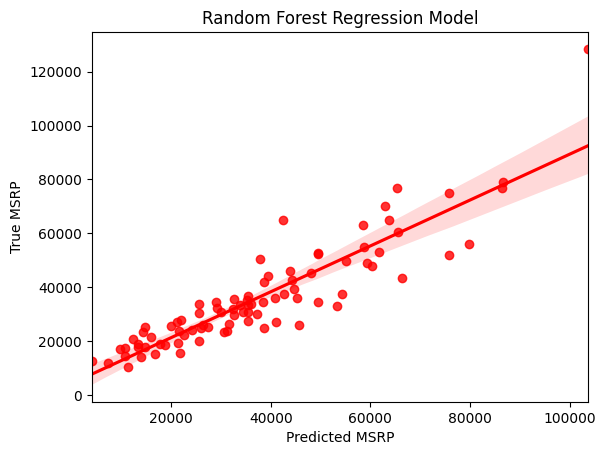

In [0]:
# Random forest

y_predict_RandomForest = RandomForest_model.predict(X_test)

#plotting against y_test

fig = sns.regplot(y_predict_linear, y_test, color='r', marker='o')
fig.set(title = "Random Forest Regression Model", xlabel= "Predicted MSRP", ylabel= "True MSRP")

In [0]:
r2 = r2_score(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
MSE = mean_squared_error(y_test, y_predict_linear)
RMSE = np.sqrt(MSE)

print('r2 = ' ,r2, 'MAE = ',MAE, 'MSE = ',MSE, 'RMSE = ',RMSE)

r2 =  0.7842981779789897 MAE =  6555.734560048513 MSE =  79105471.10929047 RMSE =  8894.125651759732


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



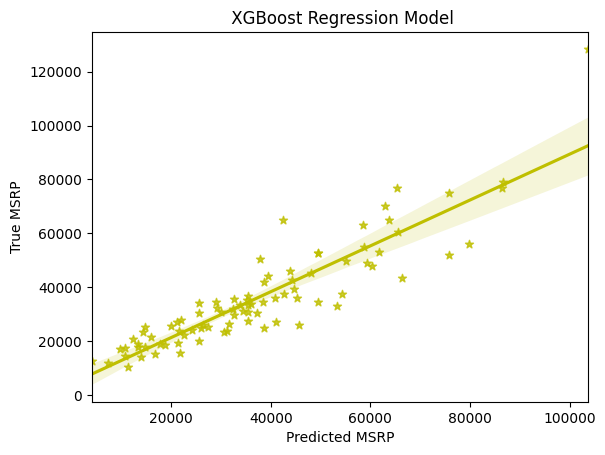

In [0]:
# XGBoost
y_predict_XGBoost = model.predict(X_test)

#plotting against y_test

fig = sns.regplot(y_predict_linear, y_test, color='y', marker='*')
fig.set(title = " XGBoost Regression Model", xlabel= "Predicted MSRP", ylabel= "True MSRP")

In [0]:
r2 = r2_score(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
MSE = mean_squared_error(y_test, y_predict_linear)
RMSE = np.sqrt(MSE)

print('r2 = ' ,r2, 'MAE = ',MAE, 'MSE = ',MSE, 'RMSE = ',RMSE)

r2 =  0.7842981779789897 MAE =  6555.734560048513 MSE =  79105471.10929047 RMSE =  8894.125651759732


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



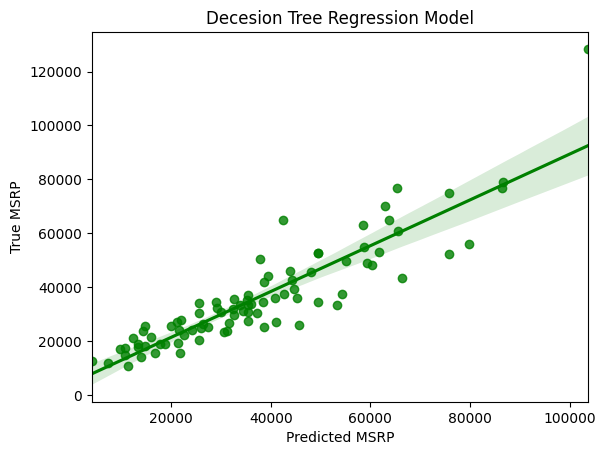

In [0]:
y_predict_DecesionTree = DecisionTree_model.predict(X_test)

#plotting against y_test

fig = sns.regplot(y_predict_linear, y_test, color='g', marker='o')
fig.set(title = "Decesion Tree Regression Model", xlabel= "Predicted MSRP", ylabel= "True MSRP")

In [0]:
r2 = r2_score(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
MSE = mean_squared_error(y_test, y_predict_linear)
RMSE = np.sqrt(MSE)

print('r2 = ' ,r2, 'MAE = ',MAE, 'MSE = ',MSE, 'RMSE = ',RMSE)

r2 =  0.7842981779789897 MAE =  6555.734560048513 MSE =  79105471.10929047 RMSE =  8894.125651759732
